In [ ]:
from pathlib import Path
import tensorflow as tf
import sys

In [ ]:
project_path = Path(__file__).parent.parent
img_dataset_path = project_path / "data" / "imgs"
model_label = "efficientnetv2"

In [ ]:
sys.path.append(project_path)
from finetune_service import fine_tune

In [6]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetV2S(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet"
)
base_model_layer_name = base_model.name
last_conv_layer_name = "top_activation"

In [7]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

Found 13957 files belonging to 2 classes.
Found 2826 files belonging to 2 classes.
Found 1088 files belonging to 2 classes.
Start training classifier
89/89 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.4936 - auc_2: 0.4214 - loss: 0.7174
initial loss: 0.72
initial accuracy: 0.49
initial auc: 0.42
Epoch 1/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 130s 183ms/step - accuracy: 0.5864 - auc_2: 0.6269 - loss: 0.6663 - val_accuracy: 0.7863 - val_auc_2: 0.8819 - val_loss: 0.5971
Epoch 2/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.7061 - auc_2: 0.7829 - loss: 0.5871 - val_accuracy: 0.8202 - val_auc_2: 0.9197 - val_loss: 0.5319
Epoch 3/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 54s 124ms/step - accuracy: 0.7537 - auc_2: 0.8373 - loss: 0.5397 - val_accuracy: 0.8369 - val_auc_2: 0.9333 - val_loss: 0.4867
Epoch 4/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 53s 121ms/step - accuracy: 0.7808 - auc_2: 0.8665 - loss: 0.5022 - val_accuracy: 0.8510 - val_auc_2: 0.9422 - val_loss: 0.4531
Epoch 5/10
437/437 ━━━━━━━━━━

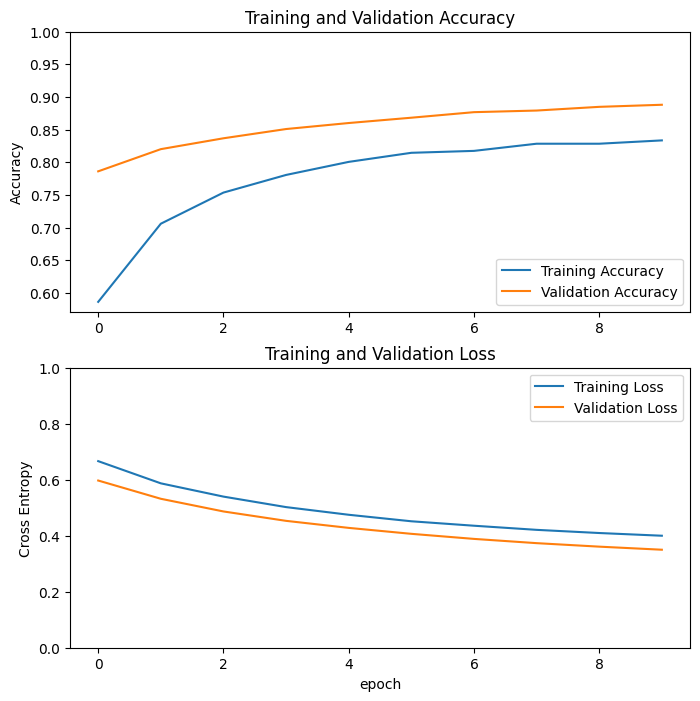

Let's select the best checkpoint based on accuracy:
model_epoch_01.keras      | Test: 0.8107 | Val: 0.7863 | Gap: -0.0244
model_epoch_02.keras      | Test: 0.7868 | Val: 0.8202 | Gap: 0.0335
model_epoch_03.keras      | Test: 0.7711 | Val: 0.8369 | Gap: 0.0657
model_epoch_04.keras      | Test: 0.7564 | Val: 0.8510 | Gap: 0.0946
model_epoch_05.keras      | Test: 0.7528 | Val: 0.8602 | Gap: 0.1075
model_epoch_06.keras      | Test: 0.7491 | Val: 0.8684 | Gap: 0.1193
model_epoch_07.keras      | Test: 0.7500 | Val: 0.8769 | Gap: 0.1269
model_epoch_08.keras      | Test: 0.7436 | Val: 0.8793 | Gap: 0.1358
model_epoch_09.keras      | Test: 0.7445 | Val: 0.8850 | Gap: 0.1405
model_epoch_10.keras      | Test: 0.7408 | Val: 0.8882 | Gap: 0.1474

Best checkpoint: model_epoch_01.keras with test accuracy = 0.8107
Start finetuning classifier
Number of layers in the base model:  513
Number of trainable variables in the model:  99
Epoch 11/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 192s 276ms/step - accuracy: 0.69

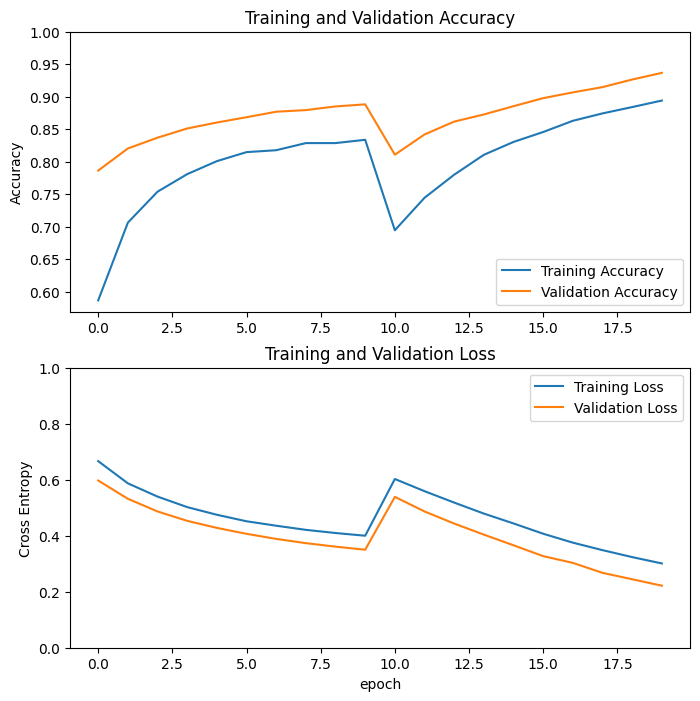

Let's select the best checkpoint based on accuracy:
model_epoch_11.keras      | Test: 0.7555 | Val: 0.8107 | Gap: 0.0552
model_epoch_12.keras      | Test: 0.7711 | Val: 0.8418 | Gap: 0.0707
model_epoch_13.keras      | Test: 0.7895 | Val: 0.8616 | Gap: 0.0721
model_epoch_14.keras      | Test: 0.7886 | Val: 0.8726 | Gap: 0.0840
model_epoch_15.keras      | Test: 0.7987 | Val: 0.8854 | Gap: 0.0866
model_epoch_16.keras      | Test: 0.8088 | Val: 0.8977 | Gap: 0.0889
model_epoch_17.keras      | Test: 0.8088 | Val: 0.9066 | Gap: 0.0978
model_epoch_18.keras      | Test: 0.8162 | Val: 0.9147 | Gap: 0.0985
model_epoch_19.keras      | Test: 0.8070 | Val: 0.9264 | Gap: 0.1194
model_epoch_20.keras      | Test: 0.7996 | Val: 0.9367 | Gap: 0.1370

Best checkpoint: model_epoch_18.keras with test accuracy = 0.8162


In [ ]:
fine_tune(
    train_path=img_dataset_path / "training",
    val_path=img_dataset_path / "validation",
    test_path=img_dataset_path / "testing",
    batch_size=32,
    img_size=IMG_SIZE,
    base_model=base_model,
    base_model_layer_name=base_model_layer_name,
    pre_process=preprocess_input,
    dropout=0.6,
    lr_classifier=10e-5,
    epochs_classifier=10,
    cp_path=project_path / "cp",
    fine_tune_at=400,
    lr_finetune=10e-7,
    epochs_finetune=10,
    model_save_path=project_path,
    last_conv_layer_name=last_conv_layer_name,
)